# MLR on Sales Data


#### Sales Data Set
- from: http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv

The mission:
Understand how each variable affects sales.


#### Data Set Information:

The variables used in the models are listed below:

- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper
- Sales: in thousands of items



## Goals of this ipynb
In this notebook we will:
- imported data
- Visualize the data and checked for correlations
- Test, train, split
- Validate the model with cross validation
- Derive detailed infomormation to inform us about the model
- Graph the model and the residuals so we could check for heteroscedacity
- Analyze the coefficients to determine what role each variable plays in sales

In [1]:
# Import packages
import pandas as pd
import numpy as np
import sklearn.linear_model 
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
% matplotlib inline

from sklearn.model_selection import train_test_split

# this allows plots to appear directly in the notebook
%matplotlib inline

In [2]:
# read data into a DataFrame
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
# print the shape of the DataFrame
df.shape

(200, 4)

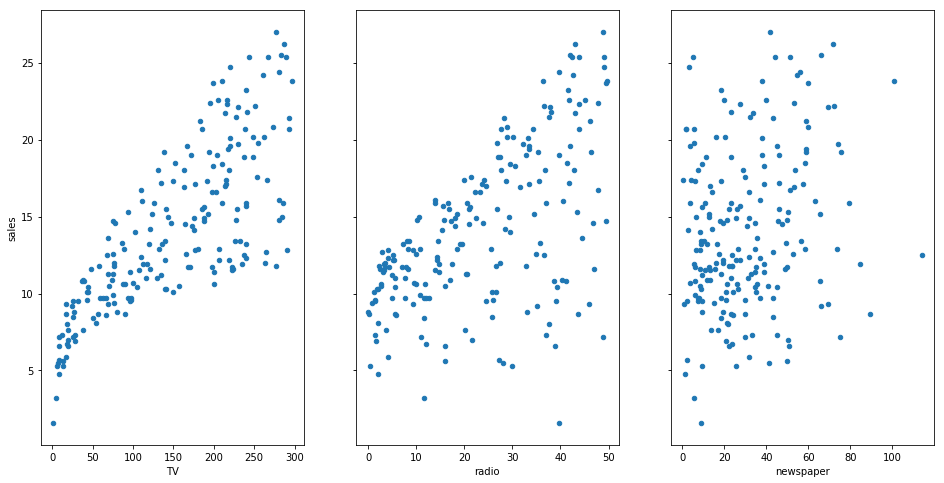

In [4]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
df.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

# Prepare X and y


In [5]:
# Column names

df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [6]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [7]:
# create a Python list of feature names
feature_cols = ['TV', 'radio', 'newspaper', 'sales']


df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [8]:
# experiment to drop more
X = df.iloc[:, :3]



# print the first 5 rows
X.head()


,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [9]:
# Set y

y=df.sales
y.shape

(200,)

## Check for correlations

In [10]:
# Make Correltion grid
corr = X.corr(method='kendall')
corr.style.background_gradient(cmap='YlOrRd').set_precision(4).set_properties(**{'font-size': '14pt'})



,TV,radio,newspaper
TV,1,0.0412,0.03416
radio,0.0412,1,0.2071
newspaper,0.03416,0.2071,1


In [11]:
# Make Correltion grid
corr = X.corr(method='pearson')
corr.style.background_gradient(cmap='YlOrRd').set_precision(4).set_properties(**{'font-size': '14pt'})



,TV,radio,newspaper
TV,1,0.05481,0.05665
radio,0.05481,1,0.3541
newspaper,0.05665,0.3541,1


Kendall-Tau correlation is often better to evaluate, but neither shows strong correlations that might interfere with the MLR.
#### No substantial correlations exist.

# Simple Linear Regression

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=98)
X_train.shape, y_test.shape

clf = LinearRegression()
clf.fit(X_train,y_train)
clf.score(X_test, y_test)
clf.predict(X_test)

array([17.18608932,  9.39058407, 16.90450124, 18.10652114, 21.7106274 ,
        5.46739391, 12.92166633,  6.94477863, 15.25337591, 11.87065573,
        6.65660838,  7.93892674, 16.25897114,  9.72759953, 23.4995226 ,
       22.07203825, 13.8287758 , 18.36893436, 12.58413089, 14.02510967,
       10.90087639,  6.25273721, 21.52716909,  8.80727045,  9.84273428,
       20.48651995,  6.66608693, 13.83857719, 12.53814824, 18.29046053,
        7.72475017, 21.1108397 , 19.23625005, 13.7904886 , 17.16622911,
        8.97477691, 13.29132728,  6.61048994, 10.22250112, 20.12974481])

In [13]:
clf.intercept_, clf.score(X_test, y_test)

(3.1329053722276896, 0.9400331814664702)

### Our model scored well on the first try, with an R2 of 0.9400.

### Our model did well on the first try, however test/train/split has high variance. The scores can vary depending on the split and random state. Let's use the mean of cross validation scores to get a more accurate score for our model.


# Cross validation

In [14]:
# provides many metrics
from sklearn.model_selection import cross_validate
model = LinearRegression()

cross_scores = cross_validate(model, X, y, cv=10,\
                        scoring=('r2', 'neg_mean_squared_error'), \
                              return_train_score=True)
print(cross_scores)



{'fit_time': array([0.00542498, 0.00423717, 0.01033187, 0.0039742 , 0.00294924,
       0.00248599, 0.00249314, 0.00237632, 0.00254583, 0.0015099 ]), 'score_time': array([0.00933623, 0.00346994, 0.00444627, 0.00347805, 0.00244594,
       0.00198388, 0.00187492, 0.00202394, 0.0016191 , 0.00147605]), 'test_r2': array([0.87302696, 0.8581613 , 0.92968723, 0.89013272, 0.93146498,
       0.93138735, 0.7597901 , 0.91217097, 0.83891753, 0.92882311]), 'train_r2': array([0.89876249, 0.90011256, 0.89101495, 0.8973717 , 0.89392771,
       0.89346698, 0.91380217, 0.89553515, 0.90075721, 0.89235558]), 'test_neg_mean_squared_error': array([-3.56038438, -3.29767522, -2.08943356, -2.82474283, -1.3027754 ,
       -1.74163618, -8.17338214, -2.11409746, -3.04273109, -2.45281793]), 'train_neg_mean_squared_error': array([-2.72787608, -2.74639174, -2.86826637, -2.78971581, -2.95331612,
       -2.90554922, -2.24672817, -2.86070984, -2.77705137, -2.82741888])}


In [15]:
print('R2 mean of train:',cross_scores['train_r2'].mean())
print(cross_scores['train_r2'])

print('\nR2 mean of test:',cross_scores['test_r2'].mean())
print(cross_scores['test_r2'])

R2 mean of train: 0.8977106511432211
[0.89876249 0.90011256 0.89101495 0.8973717  0.89392771 0.89346698
 0.91380217 0.89553515 0.90075721 0.89235558]

R2 mean of test: 0.8853562237979616
[0.87302696 0.8581613  0.92968723 0.89013272 0.93146498 0.93138735
 0.7597901  0.91217097 0.83891753 0.92882311]


In [16]:
# examine metrics available

for key, value in cross_scores.items() :
    print (key)

fit_time
score_time
test_r2
train_r2
test_neg_mean_squared_error
train_neg_mean_squared_error


In [17]:
# MSE, RMSE and R2
from sklearn.metrics import mean_squared_error


# Test
mse_cross_val_test= -cross_scores['test_neg_mean_squared_error'].mean()
rmse_cross_val_test=np.sqrt(mse_cross_val_test)
r2_cross_val_test = cross_scores['test_r2'].mean()

# Train
mse_cross_val_train= -cross_scores['train_neg_mean_squared_error'].mean()
rmse_cross_val_train=np.sqrt(mse_cross_val_train)
r2_cross_val_train = cross_scores['train_r2'].mean()



print('\n\t ** Cross Validation Training Sets **')
print('MSE Cross Validation Train:',mse_cross_val_train)
print('RMSE Cross Validation Train:',   rmse_cross_val_train)
print('R2 Cross Validation Train:',r2_cross_val_train)

print('\n\t** Cross Validation Test Sets **')
print('MSE Cross Validation Test:',mse_cross_val_test)
print('RMSE Cross Validation Test:',rmse_cross_val_test)
print('R2 Cross Validation Test:',r2_cross_val_test )




	 ** Cross Validation Training Sets **
MSE Cross Validation Train: 2.770302360080497
RMSE Cross Validation Train: 1.66442253051336
R2 Cross Validation Train: 0.8977106511432211

	** Cross Validation Test Sets **
MSE Cross Validation Test: 3.059967618118513
RMSE Cross Validation Test: 1.7492763126843378
R2 Cross Validation Test: 0.8853562237979616


In [18]:
# Adjusted R of Cross Validation

adj_cross_val_train = 1-(1-r2_cross_val_train)*(835-1)/(835-26-1)
adj_cross_val_test = 1-(1-r2_cross_val_test)*(512-1)/(512-26-1)

print('Adjusted R2 Cross Validation Test:',adj_cross_val_test)

print('Adjusted R2 Cross Validation Train:',adj_cross_val_train)


Adjusted R2 Cross Validation Test: 0.8792103718778523
Adjusted R2 Cross Validation Train: 0.8944191621948594


# Plot Cross Validation

In [19]:
from sklearn import linear_model 
from sklearn.model_selection import cross_val_predict

y_pred=cross_val_predict(model, X, y, cv=10)

residuals = y - y_pred

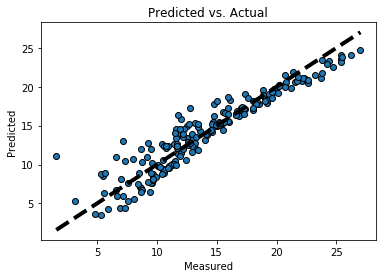

In [20]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt



# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(model, X, y, cv=3)

fig, ax = plt.subplots()
ax.scatter(y, y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Predicted vs. Actual')
plt.show()

# Plot the predicted value versus the residual

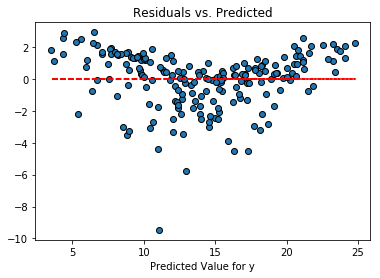

In [21]:
fig, ax = plt.subplots()
ax.scatter(y_pred, residuals, edgecolors=(0, 0, 0))
#ax.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()])
ax.set_xlabel('Predicted Value for y')
ax.set_ylabel('')
ax.set_title('Residuals vs. Predicted')


# Calculate the simple average of the data
y_mean = [np.mean(residuals)]*len(y_pred)

# Plot the average line
mean_line = ax.plot(y_pred,y_mean, label='Mean', linestyle='--', color='red')

# Make a legend
#legend = ax.legend(loc='upper right')

The residuals are spread out and don't display any strong pattern. The residuals demonstrate homoscedacity.

## Evaluate Coefficients


In [22]:
clf.coef_

array([ 0.04457497,  0.1862015 , -0.0014397 ])

In [23]:
feature_cols

['TV', 'radio', 'newspaper', 'sales']

In [24]:
# print the intercept and coefficients
print(clf.intercept_)
print(clf.coef_)

3.1329053722276896
[ 0.04457497  0.1862015  -0.0014397 ]


In [25]:
# pair the feature names with the coefficients
list(zip(feature_cols, clf.coef_))

[('TV', 0.0445749719979352),
 ('radio', 0.1862015014707931),
 ('newspaper', -0.0014396961914510114)]

# Summary

Let's look at what we accomplished in this notebook:

- Imported data
- Visualized the data and checked for correlations
- Test, train, split
- Validated the model with cross validation
- Checked for correlations that might interfere with our MLR
- Derived detailed infomormation to inform us about the model
- Graphed the model and the residuals so we could check for heteroscedacity

### Detailed information about the final model
	** Cross Validation Test Sets **
- MSE Cross Validation Test: 3.059967618118513
- RMSE Cross Validation Test: 1.7492763126843378
- R2 Cross Validation Test: 0.8853562237979616
    
- Adjusted R2 Cross Validation Test: 0.8792103718778523
- Adjusted R2 Cross Validation Train: 0.8944191621948594

$$y  = 3.132 + 0.0445 \times TV + 0.1862 \times Radio + - 0.0014 \times Newspaper$$




How do we interpret the **TV coefficient** (0.0445)?

- For a given amount of Radio and Newspaper ad spending, **a "unit" increase in TV ad spending** is associated with a **0.0445 "unit" increase in Sales**.
- Or more clearly: For a given amount of Radio and Newspaper ad spending, **an additional $1,000 spent on TV ads** is associated with an **increase in sales of 44.5 items**.

Important notes:

- This is a statement of **association**, not **causation**.
- If an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.